In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv(r'C:\Users\Elizabeth\Documents\Data Analytics\course\TERM4\EN_APEI-Can-Prov_Terr.csv', encoding = 'latin1')
df.head()

Index       Region                      Source Sector Subsector  \
0    1.0           AB  Ore and Mineral Industries    NaN       NaN   
1    1.0           BC  Ore and Mineral Industries    NaN       NaN   
2    1.0  Unspecified  Ore and Mineral Industries    NaN       NaN   
3    1.0           MB  Ore and Mineral Industries    NaN       NaN   
4    1.0           NB  Ore and Mineral Industries    NaN       NaN   

  Is it a total    Year       TPM (t)      PM10 (t)     PM25 (t)  ...  \
0             y  1990.0  27838.262007   8171.573406  2874.894219  ...   
1             y  1990.0  24263.863642  11296.732082  6158.367847  ...   
2             y  1990.0           NaN           NaN          NaN  ...   
3             y  1990.0  10781.344640   6530.918616  3287.360693  ...   
4             y  1990.0   4856.683941   1529.098805   651.456258  ...   

         Pb (kg)       Cd (kg)       Hg (kg)  D/F (gTEQ)         B(a)p  \
0     416.163534      5.772593     92.824010    0.002173      0.407351   
1      57.772251      1.846344   3084.899405    0.000143      9.164659   
2  942553.747399  78483.801189           NaN   42.093600  26870.500000   
3      28.563421      0.525974  19959.679177    0.000143      0.037110   
4      18.294893      0.949639    121.556350    0.000066      0.099055   

          B(b)f         B(k)f  I(1,2,3-cd)p      PAH (kg)  HCB (g)  
0      1.425729      0.505794      0.407351      2.746226      NaN  
1     12.693411     12.110903      5.062677     39.031650      NaN  
2  25789.000000  16893.400000  10092.900000  79645.800000  5466.35  
3      0.129885      0.046078      0.037110      0.250183      NaN  
4      0.346693      0.122993      0.099055      0.667797      NaN  

[5 rows x 25 columns]

In [3]:
colnames = df.columns
colnames

Index(['Index', 'Region', 'Source', 'Sector', 'Subsector', 'Is it a total',
       'Year', 'TPM (t)', 'PM10 (t)', 'PM25 (t)', 'SOX (t)', 'NOX (t)',
       'VOC (t)', 'CO (t)', 'NH3 (t)', 'Pb (kg)', 'Cd (kg)', 'Hg (kg)',
       'D/F (gTEQ)', 'B(a)p', 'B(b)f', 'B(k)f', 'I(1,2,3-cd)p', 'PAH (kg)',
       'HCB (g)'],
      dtype='object')

In [4]:
df.rename(columns = {'Is it a total':'total', 'TPM (t)':'TPM', 'PM10 (t)':'PM10', 'PM25 (t)':'PM25', 'SOX (t)':'SOX',
                    'NOX (t)':'NOX', 'VOC (t)':'VOC', 'CO (t)':'CO', 'NH3 (t)':'NH3', 'Pb (kg)':'Pb', 'Cd (kg)':'Cd',
                    'Hg (kg)':'Hg','D/F (gTEQ)':'DF', 'B(a)p':'Bap', 'B(b)f':'Bbf', 'B(k)f':'Bkf', 'I(1,2,3-cd)p':'Ip', 
                     'PAH (kg)':'PAH', 'HCB (g)':'HCB'}, inplace = True)

In [6]:
pip install pandas-profiling[notebook]

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cdb31f3a46e74404ddc5cf519d9ba32f0d338874a022c3c980af440696012196
  Stored in directory: c:\users\elizabeth\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=3d57e80f96de1d4e7e0428b9372ffb1247fb415a929d05677a46ca83f17f8d30
  Stored in directory: c:\users\elizabeth\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built htmlmin imagehash
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = df.profile_report(title="Pandas Profiling Report")
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.dtypes

Index        float64
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year         float64
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [6]:
df.shape

(66390, 25)

In [7]:
#change type of Index and Year from float64 and object respectively to int32
df['Index'] = df['Index'].astype('int')
df['Year'] = df['Year'].astype('int')
df.dtypes

Index          int32
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year           int32
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66390 entries, 0 to 66389
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      66390 non-null  int32  
 1   Region     66390 non-null  object 
 2   Source     66390 non-null  object 
 3   Sector     61320 non-null  object 
 4   Subsector  54180 non-null  object 
 5   total      12210 non-null  object 
 6   Year       66390 non-null  int32  
 7   TPM        34032 non-null  float64
 8   PM10       33960 non-null  float64
 9   PM25       34002 non-null  float64
 10  SOX        24136 non-null  float64
 11  NOX        25801 non-null  float64
 12  VOC        30948 non-null  float64
 13  CO         25757 non-null  float64
 14  NH3        22634 non-null  float64
 15  Pb         13164 non-null  float64
 16  Cd         11829 non-null  float64
 17  Hg         20301 non-null  float64
 18  DF         14676 non-null  float64
 19  Bap        14065 non-null  float64
 20  Bbf   

In [9]:
#Count of NA's per column
df.isna().sum()

Index            0
Region           0
Source           0
Sector        5070
Subsector    12210
total        54180
Year             0
TPM          32358
PM10         32430
PM25         32388
SOX          42254
NOX          40589
VOC          35442
CO           40633
NH3          43756
Pb           53226
Cd           54561
Hg           46089
DF           51714
Bap          52325
Bbf          52386
Bkf          52787
Ip           52531
PAH          52933
HCB          59060
dtype: int64

<AxesSubplot:>

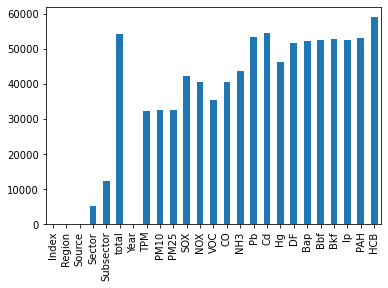

In [10]:
#Visualize the sum of NA's of each features
df.isna().sum()[df.isna().sum()>=0].plot(kind='bar')

In [11]:
#total NA's of the dataset
df.isna().sum().sum()

898922

In [12]:
df1 = df.describe()
print(round(df1, 2))

          Index      Year          TPM        PM10        PM25         SOX  \
count  66390.00  66390.00     34032.00    33960.00    34002.00    24136.00   
mean      79.54   2004.50     84379.95    26902.43     5663.52    10932.16   
std       45.63      8.66    833510.51   260958.74    51617.32    82698.84   
min        1.00   1990.00         0.00        0.00        0.00        0.00   
25%       40.00   1997.00        10.40        7.26        4.35        1.48   
50%       80.00   2004.50       149.95      101.47       60.49       45.89   
75%      119.00   2012.00      1606.78      951.23      519.88      811.31   
max      158.00   2019.00  28912967.21  8880675.05  1690838.10  3004321.65   

              NOX         VOC           CO        NH3          Pb        Cd  \
count    25801.00    30948.00     25757.00   22634.00    13164.00  11829.00   
mean     10775.76     9748.23     39647.74    2677.07     4968.40    406.64   
std      85643.38    84028.98    331672.54   20532.46    431

array([[<AxesSubplot:title={'center':'TPM'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'VOC'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'Cd'}>,
        <AxesSubplot:title={'center':'Hg'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'Bap'}>,
        <AxesSubplot:title={'center':'Bbf'}>,
        <AxesSubplot:title={'center':'Bkf'}>,
        <AxesSubplot:title={'center':'Ip'}>],
       [<AxesSubplot:title={'center':'PAH'}>,
        <AxesSubplot:title={'center':'HCB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

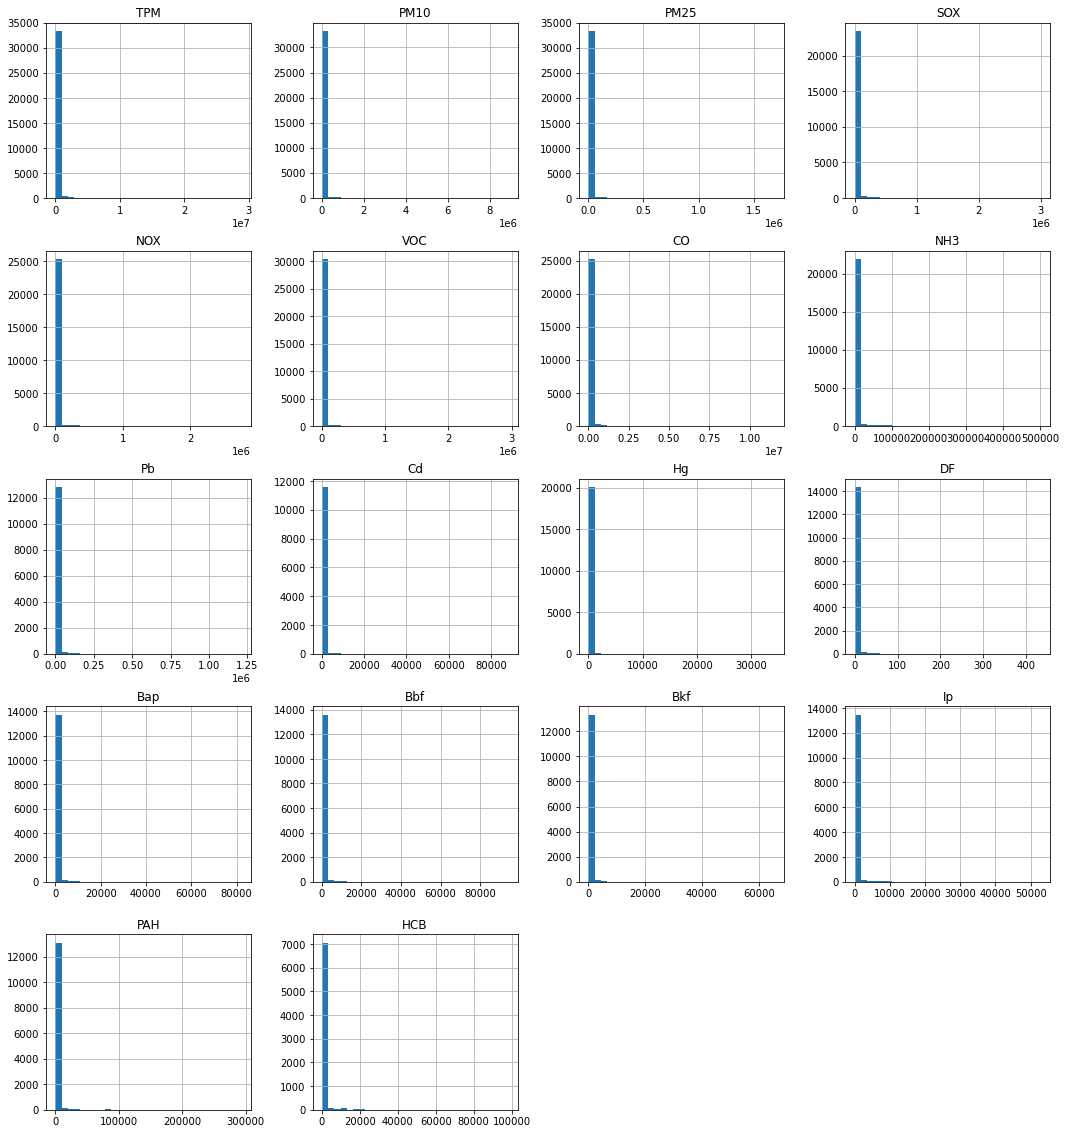

In [13]:
df_test = df.drop(['Index', 'Year'], axis=1)
df_test.hist(bins=30, figsize=(18, 20))

In [14]:
#Determine number of entries for each of the Regions
df['Region'].value_counts(dropna=False).sort_index(ascending=True)

AB             4740
BC             4740
CA               30
MB             4740
NB             4740
NL             4740
NS             4740
NT             4740
NU             4740
ON             4740
PE             4740
QC             4740
SK             4740
Unspecified    4740
YT             4740
Name: Region, dtype: int64

In [15]:
#2019 Pollutants Emissions Inventory Report shows that TPM, PM10, PM25, and NH3 displayed increase in emanation

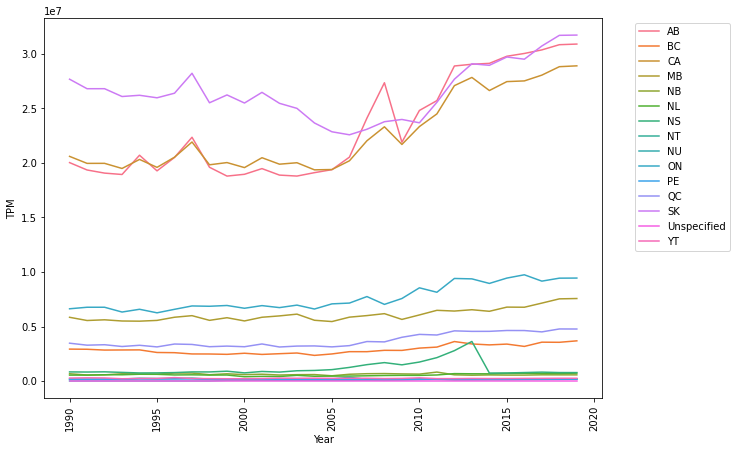

In [15]:
#Visualize trends of the TPM pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'TPM': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='TPM', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

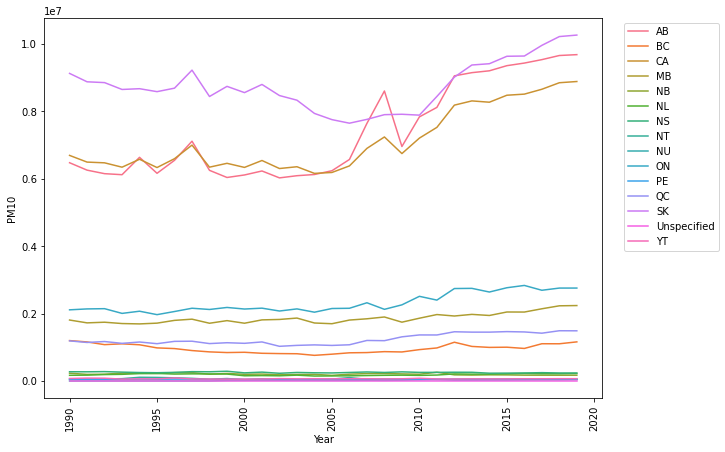

In [16]:
#Visualize trends of the PM10 pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'PM10': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='PM10', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

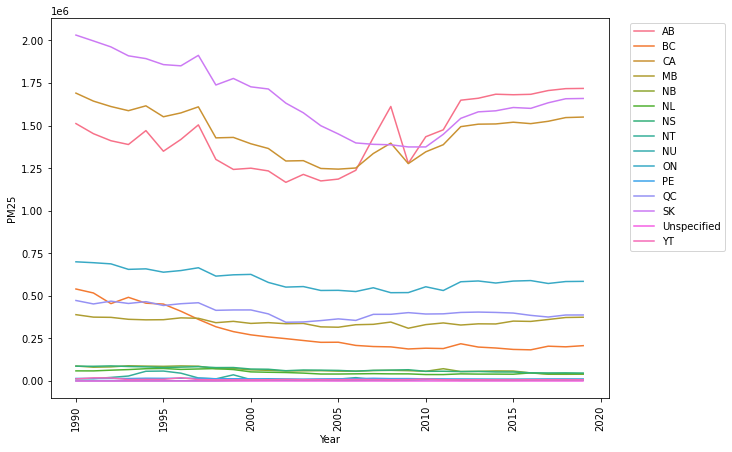

In [17]:
#Visualize trends of the PM25 pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'PM25': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='PM25', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

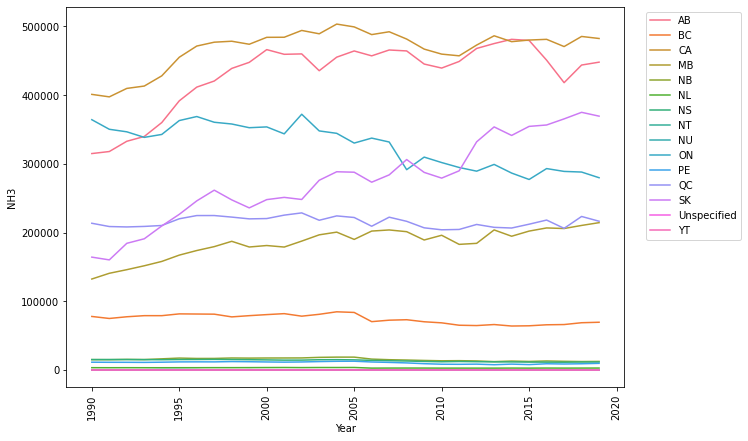

In [18]:
#Visualize trends of the NH3 pollutants emissions of all the Regions
dfg = df.groupby(['Year', 'Region']).agg({'NH3': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='NH3', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

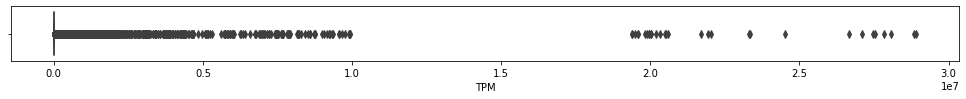

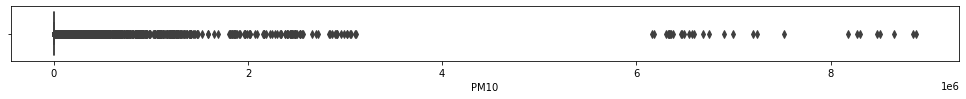

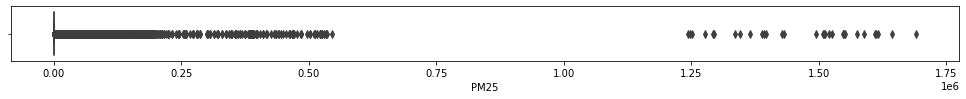

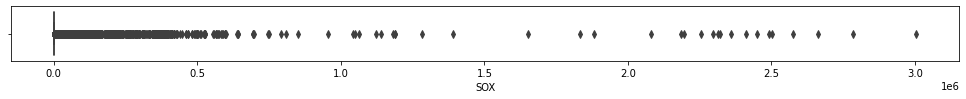

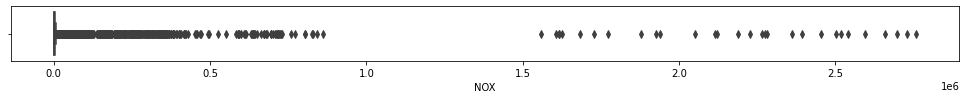

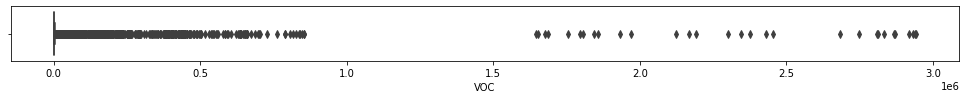

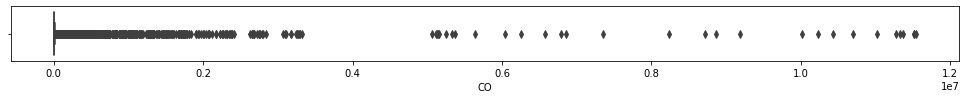

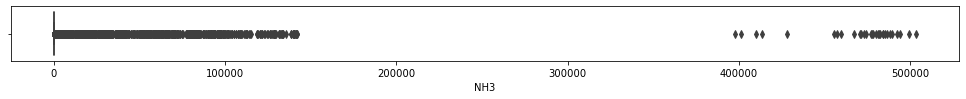

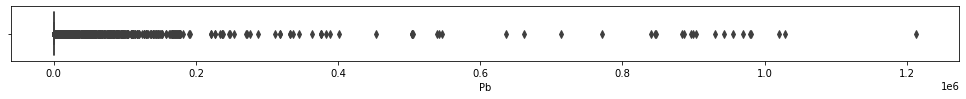

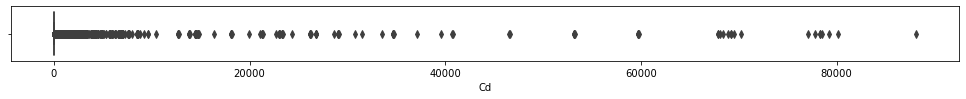

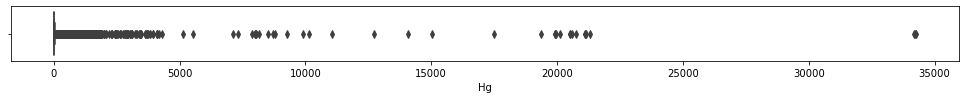

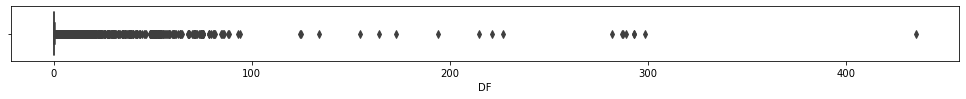

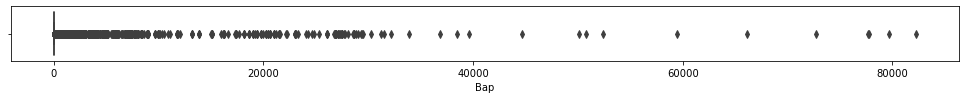

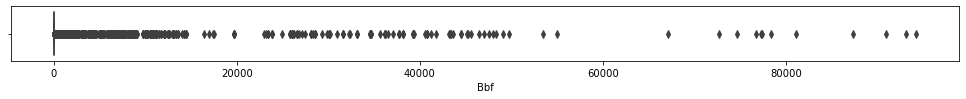

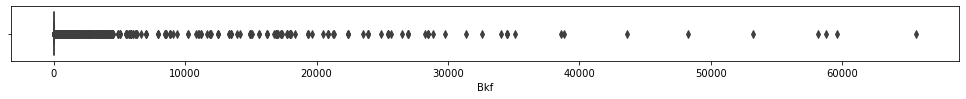

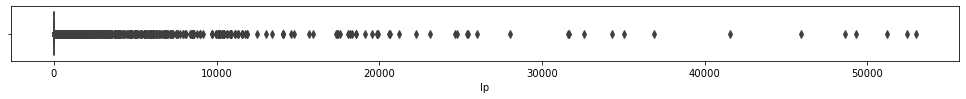

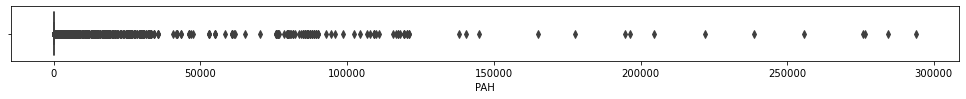

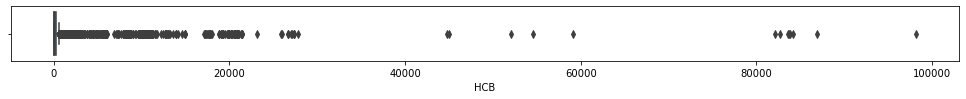

In [19]:
dfb=df.select_dtypes(exclude=['object', 'int32'])
for att in dfb:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=dfb, x=att)

In [20]:
#Check Region, if with missing values. Result shows no missing values.
Region_count = sum(df['Region'].value_counts(dropna=False))
Region_count

66390

In [21]:
#Check Source classifications, if with missing values
df['Source'].value_counts(dropna=False).sort_index(ascending=False)

Transportation and Mobile Equipment          7140
Paints and Solvents                          2100
Ore and Mineral Industries                  16380
Oil and Gas Industry                         7980
Manufacturing                               12600
Incineration and Waste                       5460
GRAND TOTAL                                   450
Fires                                        1260
Electric Power Generation (Utilities)        2520
Dust                                         2520
Commercial/Residential/Institutional          420
Commercial / Residential / Institutional     3780
Agriculture                                  3780
Name: Source, dtype: int64

In [22]:
df.drop( df[ df['Source'] == 'GRAND TOTAL' ].index , inplace=True)

In [23]:
#Df rows reduced to 65940
Source_count = sum(df['Source'].value_counts(dropna=False))
Source_count

65940

In [24]:
#GRAND TOTAL deleted
df['Source'].value_counts(dropna=False).sort_index(ascending=False)

Transportation and Mobile Equipment          7140
Paints and Solvents                          2100
Ore and Mineral Industries                  16380
Oil and Gas Industry                         7980
Manufacturing                               12600
Incineration and Waste                       5460
Fires                                        1260
Electric Power Generation (Utilities)        2520
Dust                                         2520
Commercial/Residential/Institutional          420
Commercial / Residential / Institutional     3780
Agriculture                                  3780
Name: Source, dtype: int64

In [25]:
df['Source'].isna().sum()

0

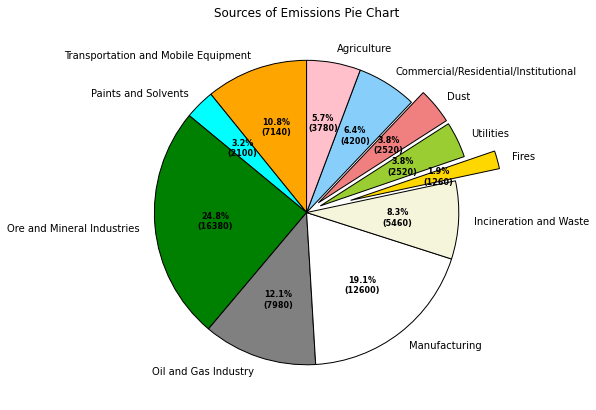

In [26]:
#Visualize distribution of entries for feature: "Sources"
df['Source'].value_counts (dropna=False)

Source = ['Transportation and Mobile Equipment', 'Paints and Solvents', 'Ore and Mineral Industries', 'Oil and Gas Industry',
        'Manufacturing', 'Incineration and Waste', 'Fires', 'Utilities', 'Dust', 'Commercial/Residential/Institutional',
        'Agriculture'] 
data = [7140, 2100, 16380, 7980, 12600, 5460, 1260, 2520, 2520, 4200, 3780]
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.1, 0.0, 0.0)
colors = ( 'orange', 'cyan', 'green', 'grey', 'white', 'beige',
          'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink')  
wp = { 'linewidth' : 1, 'edgecolor' : 'black' } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return '{:.1f}%\n({:d})'.format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
    autopct = lambda pct: func(pct, data), 
    explode = explode,
    labels = Source,  
    colors = colors, 
    startangle = 90, 
    wedgeprops = wp, 
    textprops = dict(color ='black')) 

plt.setp(autotexts, size=8, weight='bold')

ax.set_title('Sources of Emissions Pie Chart')

plt.show() 

In [27]:
#Check Sector, if with missing values
df['Sector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing          420
Air Transportation (LTO)         420
Aluminium Industry              1680
Animal Production                420
Asphalt Paving Industry          420
                                ... 
Waste Incineration              2100
Waste Materials                  420
Waste Treatment and Disposal    2520
Wood Products                   1680
NaN                             4620
Name: Sector, Length: 74, dtype: int64

In [28]:
#Fill in missing values for Sector
df['Sector'] = df['Sector'].fillna('Unspecified')
df['Sector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing                                        420
Air Transportation (LTO)                                       420
Aluminium Industry                                            1680
Animal Production                                              420
Asphalt Paving Industry                                        420
                                                              ... 
Vehicle Manufacturing (Engines, Parts, Assembly, Painting)     420
Waste Incineration                                            2100
Waste Materials                                                420
Waste Treatment and Disposal                                  2520
Wood Products                                                 1680
Name: Sector, Length: 74, dtype: int64

In [29]:
df['Sector'].isna().sum()

0

In [30]:
#Check Subsector, if with missing values
df['Subsector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing               420
Accidents and Equipment Failures      420
Air Transportation (LTO)              420
Alumina (Bauxite Refining)            420
Animal Production                     420
                                    ...  
Waste Materials                       420
Waste Sorting and Transfer            420
Well Drilling/Servicing/Testing       420
Wind Erosion                          420
NaN                                 11760
Name: Subsector, Length: 130, dtype: int64

In [31]:
#Fill in missing values for Subsector
df['Subsector'] = df['Subsector'].fillna('No_subsector')
df['Subsector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing             420
Accidents and Equipment Failures    420
Air Transportation (LTO)            420
Alumina (Bauxite Refining)          420
Animal Production                   420
                                   ... 
Warehousing and Storage             420
Waste Materials                     420
Waste Sorting and Transfer          420
Well Drilling/Servicing/Testing     420
Wind Erosion                        420
Name: Subsector, Length: 130, dtype: int64

In [32]:
df['Subsector'].isna().sum()

0

In [33]:
#Check missing values for total
df['total'].value_counts(dropna=False)

NaN    54180
y      11760
Name: total, dtype: int64

In [34]:
#Fill in missing values for total
df['total'] = df['total'].fillna('n')
df['total'].value_counts(dropna=False)

n    54180
y    11760
Name: total, dtype: int64

In [35]:
df['total'].isna().sum()

0

In [36]:
#Delete all "Unspecified" as Region entry
df1 = df[df.Region != 'Unspecified']
df1.head()

Index Region                      Source       Sector     Subsector total  \
0      1     AB  Ore and Mineral Industries  Unspecified  No_subsector     y   
1      1     BC  Ore and Mineral Industries  Unspecified  No_subsector     y   
3      1     MB  Ore and Mineral Industries  Unspecified  No_subsector     y   
4      1     NB  Ore and Mineral Industries  Unspecified  No_subsector     y   
5      1     NL  Ore and Mineral Industries  Unspecified  No_subsector     y   

   Year           TPM          PM10         PM25  ...          Pb        Cd  \
0  1990  27838.262007   8171.573406  2874.894219  ...  416.163534  5.772593   
1  1990  24263.863642  11296.732082  6158.367847  ...   57.772251  1.846344   
3  1990  10781.344640   6530.918616  3287.360693  ...   28.563421  0.525974   
4  1990   4856.683941   1529.098805   651.456258  ...   18.294893  0.949639   
5  1990  26990.264763   3670.509960  1494.637876  ...   46.037566  0.383072   

             Hg        DF       Bap        Bbf        Bkf        Ip  \
0     92.824010  0.002173  0.407351   1.425729   0.505794  0.407351   
1   3084.899405  0.000143  9.164659  12.693411  12.110903  5.062677   
3  19959.679177  0.000143  0.037110   0.129885   0.046078  0.037110   
4    121.556350  0.000066  0.099055   0.346693   0.122993  0.099055   
5     62.834248  0.000244  0.012756   0.044645   0.015838  0.012756   

         PAH  HCB  
0   2.746226  NaN  
1  39.031650  NaN  
3   0.250183  NaN  
4   0.667797  NaN  
5   0.085994  NaN  

[5 rows x 25 columns]

In [37]:
#Delete all "CA" as Region entry
df2 = df1[df1.Region != 'CA']
df2.head()

Index Region                      Source       Sector     Subsector total  \
0      1     AB  Ore and Mineral Industries  Unspecified  No_subsector     y   
1      1     BC  Ore and Mineral Industries  Unspecified  No_subsector     y   
3      1     MB  Ore and Mineral Industries  Unspecified  No_subsector     y   
4      1     NB  Ore and Mineral Industries  Unspecified  No_subsector     y   
5      1     NL  Ore and Mineral Industries  Unspecified  No_subsector     y   

   Year           TPM          PM10         PM25  ...          Pb        Cd  \
0  1990  27838.262007   8171.573406  2874.894219  ...  416.163534  5.772593   
1  1990  24263.863642  11296.732082  6158.367847  ...   57.772251  1.846344   
3  1990  10781.344640   6530.918616  3287.360693  ...   28.563421  0.525974   
4  1990   4856.683941   1529.098805   651.456258  ...   18.294893  0.949639   
5  1990  26990.264763   3670.509960  1494.637876  ...   46.037566  0.383072   

             Hg        DF       Bap        Bbf        Bkf        Ip  \
0     92.824010  0.002173  0.407351   1.425729   0.505794  0.407351   
1   3084.899405  0.000143  9.164659  12.693411  12.110903  5.062677   
3  19959.679177  0.000143  0.037110   0.129885   0.046078  0.037110   
4    121.556350  0.000066  0.099055   0.346693   0.122993  0.099055   
5     62.834248  0.000244  0.012756   0.044645   0.015838  0.012756   

         PAH  HCB  
0   2.746226  NaN  
1  39.031650  NaN  
3   0.250183  NaN  
4   0.667797  NaN  
5   0.085994  NaN  

[5 rows x 25 columns]

In [38]:
#Fill in other missing values with '0'
df2.fillna(0, inplace=True)
df2.head()

Index Region                      Source       Sector     Subsector total  \
0      1     AB  Ore and Mineral Industries  Unspecified  No_subsector     y   
1      1     BC  Ore and Mineral Industries  Unspecified  No_subsector     y   
3      1     MB  Ore and Mineral Industries  Unspecified  No_subsector     y   
4      1     NB  Ore and Mineral Industries  Unspecified  No_subsector     y   
5      1     NL  Ore and Mineral Industries  Unspecified  No_subsector     y   

   Year           TPM          PM10         PM25  ...          Pb        Cd  \
0  1990  27838.262007   8171.573406  2874.894219  ...  416.163534  5.772593   
1  1990  24263.863642  11296.732082  6158.367847  ...   57.772251  1.846344   
3  1990  10781.344640   6530.918616  3287.360693  ...   28.563421  0.525974   
4  1990   4856.683941   1529.098805   651.456258  ...   18.294893  0.949639   
5  1990  26990.264763   3670.509960  1494.637876  ...   46.037566  0.383072   

             Hg        DF       Bap        Bbf        Bkf        Ip  \
0     92.824010  0.002173  0.407351   1.425729   0.505794  0.407351   
1   3084.899405  0.000143  9.164659  12.693411  12.110903  5.062677   
3  19959.679177  0.000143  0.037110   0.129885   0.046078  0.037110   
4    121.556350  0.000066  0.099055   0.346693   0.122993  0.099055   
5     62.834248  0.000244  0.012756   0.044645   0.015838  0.012756   

         PAH  HCB  
0   2.746226  0.0  
1  39.031650  0.0  
3   0.250183  0.0  
4   0.667797  0.0  
5   0.085994  0.0  

[5 rows x 25 columns]

In [39]:
df2.isna().sum()

Index        0
Region       0
Source       0
Sector       0
Subsector    0
total        0
Year         0
TPM          0
PM10         0
PM25         0
SOX          0
NOX          0
VOC          0
CO           0
NH3          0
Pb           0
Cd           0
Hg           0
DF           0
Bap          0
Bbf          0
Bkf          0
Ip           0
PAH          0
HCB          0
dtype: int64

In [40]:
#round to two decimal places
df3 = df2.round(decimals = 2)
df3.head()

Index Region                      Source       Sector     Subsector total  \
0      1     AB  Ore and Mineral Industries  Unspecified  No_subsector     y   
1      1     BC  Ore and Mineral Industries  Unspecified  No_subsector     y   
3      1     MB  Ore and Mineral Industries  Unspecified  No_subsector     y   
4      1     NB  Ore and Mineral Industries  Unspecified  No_subsector     y   
5      1     NL  Ore and Mineral Industries  Unspecified  No_subsector     y   

   Year       TPM      PM10     PM25  ...      Pb    Cd        Hg   DF   Bap  \
0  1990  27838.26   8171.57  2874.89  ...  416.16  5.77     92.82  0.0  0.41   
1  1990  24263.86  11296.73  6158.37  ...   57.77  1.85   3084.90  0.0  9.16   
3  1990  10781.34   6530.92  3287.36  ...   28.56  0.53  19959.68  0.0  0.04   
4  1990   4856.68   1529.10   651.46  ...   18.29  0.95    121.56  0.0  0.10   
5  1990  26990.26   3670.51  1494.64  ...   46.04  0.38     62.83  0.0  0.01   

     Bbf    Bkf    Ip    PAH  HCB  
0   1.43   0.51  0.41   2.75  0.0  
1  12.69  12.11  5.06  39.03  0.0  
3   0.13   0.05  0.04   0.25  0.0  
4   0.35   0.12  0.10   0.67  0.0  
5   0.04   0.02  0.01   0.09  0.0  

[5 rows x 25 columns]

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61230 entries, 0 to 65939
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      61230 non-null  int32  
 1   Region     61230 non-null  object 
 2   Source     61230 non-null  object 
 3   Sector     61230 non-null  object 
 4   Subsector  61230 non-null  object 
 5   total      61230 non-null  object 
 6   Year       61230 non-null  int32  
 7   TPM        61230 non-null  float64
 8   PM10       61230 non-null  float64
 9   PM25       61230 non-null  float64
 10  SOX        61230 non-null  float64
 11  NOX        61230 non-null  float64
 12  VOC        61230 non-null  float64
 13  CO         61230 non-null  float64
 14  NH3        61230 non-null  float64
 15  Pb         61230 non-null  float64
 16  Cd         61230 non-null  float64
 17  Hg         61230 non-null  float64
 18  DF         61230 non-null  float64
 19  Bap        61230 non-null  float64
 20  Bbf   

In [42]:
df3.describe()

Index          Year           TPM          PM10           PM25  \
count  61230.000000  61230.000000  6.123000e+04  6.123000e+04   61230.000000   
mean      79.000000   2004.500000  2.473447e+04  7.955873e+03    1716.124743   
std       45.321447      8.655512  2.621736e+05  8.064203e+04   14551.128658   
min        1.000000   1990.000000  0.000000e+00  0.000000e+00       0.000000   
25%       40.000000   1997.000000  0.000000e+00  0.000000e+00       0.000000   
50%       79.000000   2004.500000  4.100000e-01  3.400000e-01       0.240000   
75%      118.000000   2012.000000  2.078350e+02  1.423475e+02      89.570000   
max      157.000000   2019.000000  8.768052e+06  2.540033e+06  396908.960000   

                 SOX            NOX            VOC            CO  \
count   61230.000000   61230.000000   61230.000000  6.123000e+04   
mean     2473.333851    2427.492796    2661.306856  8.737772e+03   
std     21565.452844   17690.438100   18892.272017  7.055686e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.000000       0.000000  0.000000e+00   
50%         0.000000       0.000000       0.000000  0.000000e+00   
75%         7.777500      97.212500     182.092500  1.624975e+02   
max    791298.780000  497049.910000  483880.000000  2.838937e+06   

                 NH3             Pb            Cd            Hg            DF  \
count   61230.000000   61230.000000  61230.000000  61230.000000  61230.000000   
mean      530.797004     467.417642     35.524698     14.142357      0.188245   
std      5457.601072    8111.031990    819.737008    269.645100      2.441166   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000      0.000000   
75%         1.360000       0.000000      0.000000      0.000000      0.000000   
max    129931.890000  504123.880000  59724.660000  21159.730000    124.600000   

                Bap           Bbf           Bkf            Ip            PAH  \
count  61230.000000  61230.000000  61230.000000  61230.000000   61230.000000   
mean      40.679148     60.801953     28.548822     31.327227     161.222742   
std      589.478869   1014.973705    581.902419    384.143642    2512.580898   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      0.000000      0.000000      0.000000       0.000000   
max    26073.280000  40724.380000  34515.520000  14065.490000  109170.920000   

                HCB  
count  61230.000000  
mean      44.256206  
std      695.578895  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max    27337.940000

array([[<AxesSubplot:title={'center':'TPM'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'VOC'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'Cd'}>,
        <AxesSubplot:title={'center':'Hg'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'Bap'}>,
        <AxesSubplot:title={'center':'Bbf'}>,
        <AxesSubplot:title={'center':'Bkf'}>,
        <AxesSubplot:title={'center':'Ip'}>],
       [<AxesSubplot:title={'center':'PAH'}>,
        <AxesSubplot:title={'center':'HCB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

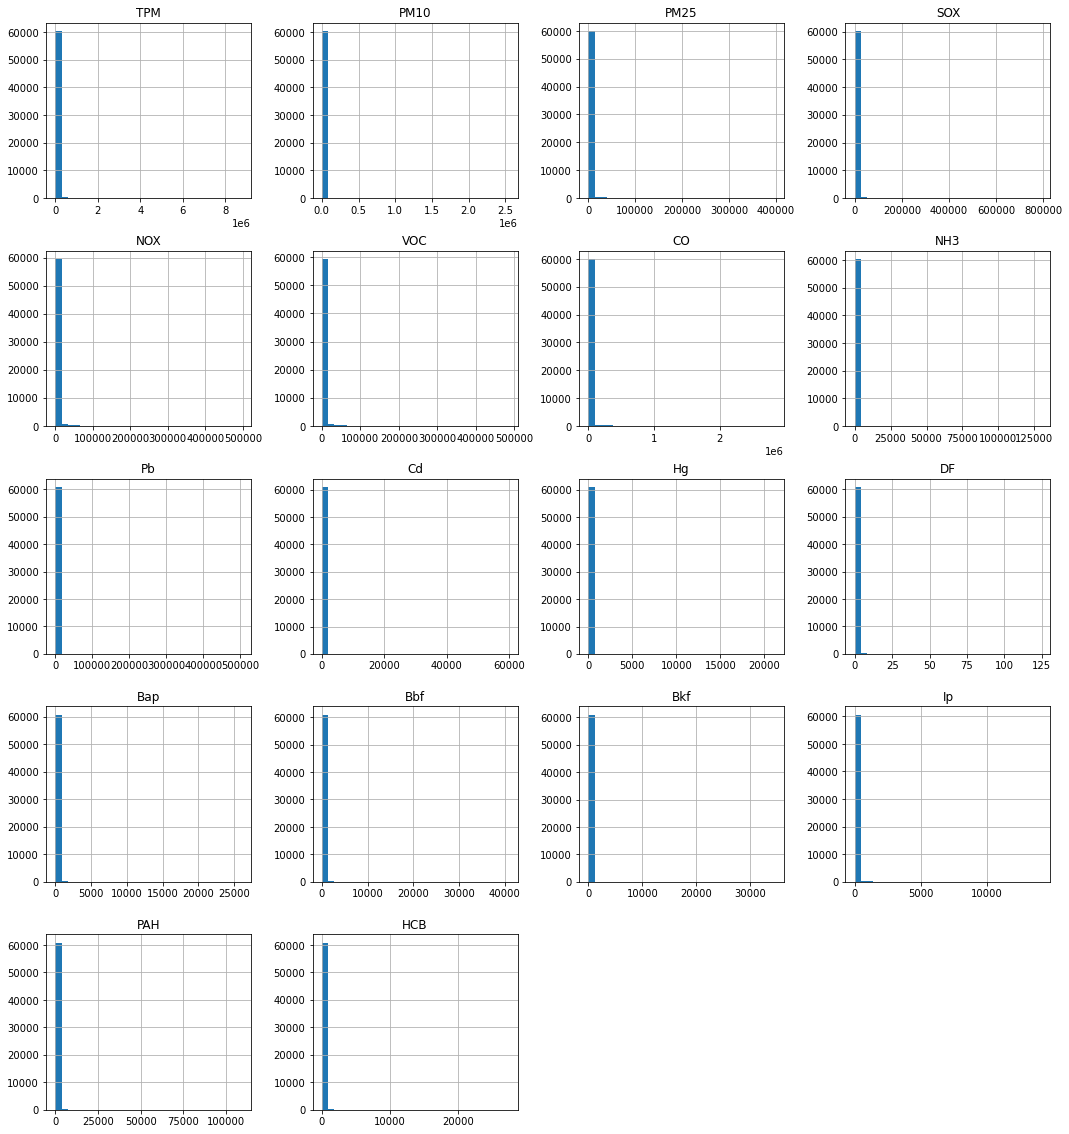

In [43]:
df3_test = df3.drop(['Index', 'Year'], axis=1)
df3_test.hist(bins=30, figsize=(18, 20))

In [44]:
#Correlation after data cleaning
cors1 = df3.corr(method="pearson")
cors1

Index          Year       TPM      PM10      PM25       SOX  \
Index  1.000000e+00 -6.584425e-13  0.121505  0.119162  0.111901 -0.096251   
Year  -6.584425e-13  1.000000e+00  0.008675  0.007085 -0.007202 -0.039652   
TPM    1.215053e-01  8.675271e-03  1.000000  0.986633  0.881567 -0.005195   
PM10   1.191622e-01  7.084562e-03  0.986633  1.000000  0.930414 -0.001135   
PM25   1.119009e-01 -7.202032e-03  0.881567  0.930414  1.000000  0.020160   
SOX   -9.625121e-02 -3.965174e-02 -0.005195 -0.001135  0.020160  1.000000   
NOX   -1.088955e-02 -1.708405e-02 -0.007572 -0.000337  0.040267  0.390207   
VOC    2.372074e-02 -2.478377e-02  0.000105  0.009080  0.055988  0.321193   
CO     2.532149e-02 -3.610422e-02 -0.004478  0.005567  0.064611  0.130645   
NH3    6.743562e-02  5.006728e-03  0.181424  0.230242  0.332142 -0.000980   
Pb    -6.437575e-02 -2.328748e-02 -0.002346 -0.000519  0.010139  0.470999   
Cd    -4.166463e-02 -1.496473e-02 -0.002656 -0.001760  0.003012  0.481012   
Hg    -2.750220e-02 -3.954131e-02 -0.002924 -0.001490  0.006530  0.397196   
DF     6.943904e-02 -4.694388e-02 -0.005842 -0.004599  0.003479  0.017015   
Bap   -1.833263e-02 -2.400841e-02 -0.000254  0.007889  0.063003  0.114433   
Bbf   -3.037918e-02 -1.907443e-02 -0.000029  0.006798  0.053216  0.117706   
Bkf   -3.412875e-02 -2.604886e-02 -0.000199  0.004335  0.035730  0.109763   
Ip     6.028123e-03 -2.489160e-02 -0.000403  0.010313  0.082184  0.098378   
PAH   -2.356238e-02 -2.317806e-02 -0.000174  0.007182  0.057118  0.114822   
HCB    4.232492e-02 -4.554846e-02 -0.004623 -0.003932  0.001281  0.046954   

            NOX       VOC        CO       NH3        Pb        Cd        Hg  \
Index -0.010890  0.023721  0.025321  0.067436 -0.064376 -0.041665 -0.027502   
Year  -0.017084 -0.024784 -0.036104  0.005007 -0.023287 -0.014965 -0.039541   
TPM   -0.007572  0.000105 -0.004478  0.181424 -0.002346 -0.002656 -0.002924   
PM10  -0.000337  0.009080  0.005567  0.230242 -0.000519 -0.001760 -0.001490   
PM25   0.040267  0.055988  0.064611  0.332142  0.010139  0.003012  0.006530   
SOX    0.390207  0.321193  0.130645 -0.000980  0.470999  0.481012  0.397196   
NOX    1.000000  0.747939  0.694728  0.010780  0.023961  0.007652  0.028731   
VOC    0.747939  1.000000  0.613331  0.080488  0.003787  0.001355  0.007310   
CO     0.694728  0.613331  1.000000  0.012341  0.044574  0.008332  0.014950   
NH3    0.010780  0.080488  0.012341  1.000000 -0.002684 -0.002346 -0.001486   
Pb     0.023961  0.003787  0.044574 -0.002684  1.000000  0.663689  0.172887   
Cd     0.007652  0.001355  0.008332 -0.002346  0.663689  1.000000  0.176259   
Hg     0.028731  0.007310  0.014950 -0.001486  0.172887  0.176259  1.000000   
DF     0.020020  0.016504  0.033283 -0.000847  0.018691  0.053861  0.068892   
Bap    0.076440  0.096611  0.264808 -0.001834  0.165684  0.035190  0.042494   
Bbf    0.037473  0.063115  0.203652 -0.002474  0.173321  0.036135  0.040755   
Bkf    0.047163  0.051715  0.196162 -0.001778  0.168507  0.031359  0.042038   
Ip     0.098898  0.133997  0.315340 -0.001557  0.139245  0.030523  0.038310   
PAH    0.059105  0.080630  0.238040 -0.002076  0.169201  0.034783  0.042019   
HCB    0.015430  0.014747  0.009920 -0.000195  0.043783  0.051554  0.057858   

             DF       Bap       Bbf       Bkf        Ip       PAH       HCB  
Index  0.069439 -0.018333 -0.030379 -0.034129  0.006028 -0.023562  0.042325  
Year  -0.046944 -0.024008 -0.019074 -0.026049 -0.024892 -0.023178 -0.045548  
TPM   -0.005842 -0.000254 -0.000029 -0.000199 -0.000403 -0.000174 -0.004623  
PM10  -0.004599  0.007889  0.006798  0.004335  0.010313  0.007182 -0.003932  
PM25   0.003479  0.063003  0.053216  0.035730  0.082184  0.057118  0.001281  
SOX    0.017015  0.114433  0.117706  0.109763  0.098378  0.114822  0.046954  
NOX    0.020020  0.076440  0.037473  0.047163  0.098898  0.059105  0.015430  
VOC    0.016504  0.096611  0.063115  0.051715  0.133997  0.080630  0.014747  
CO     0.033283  0.264808  0.20365

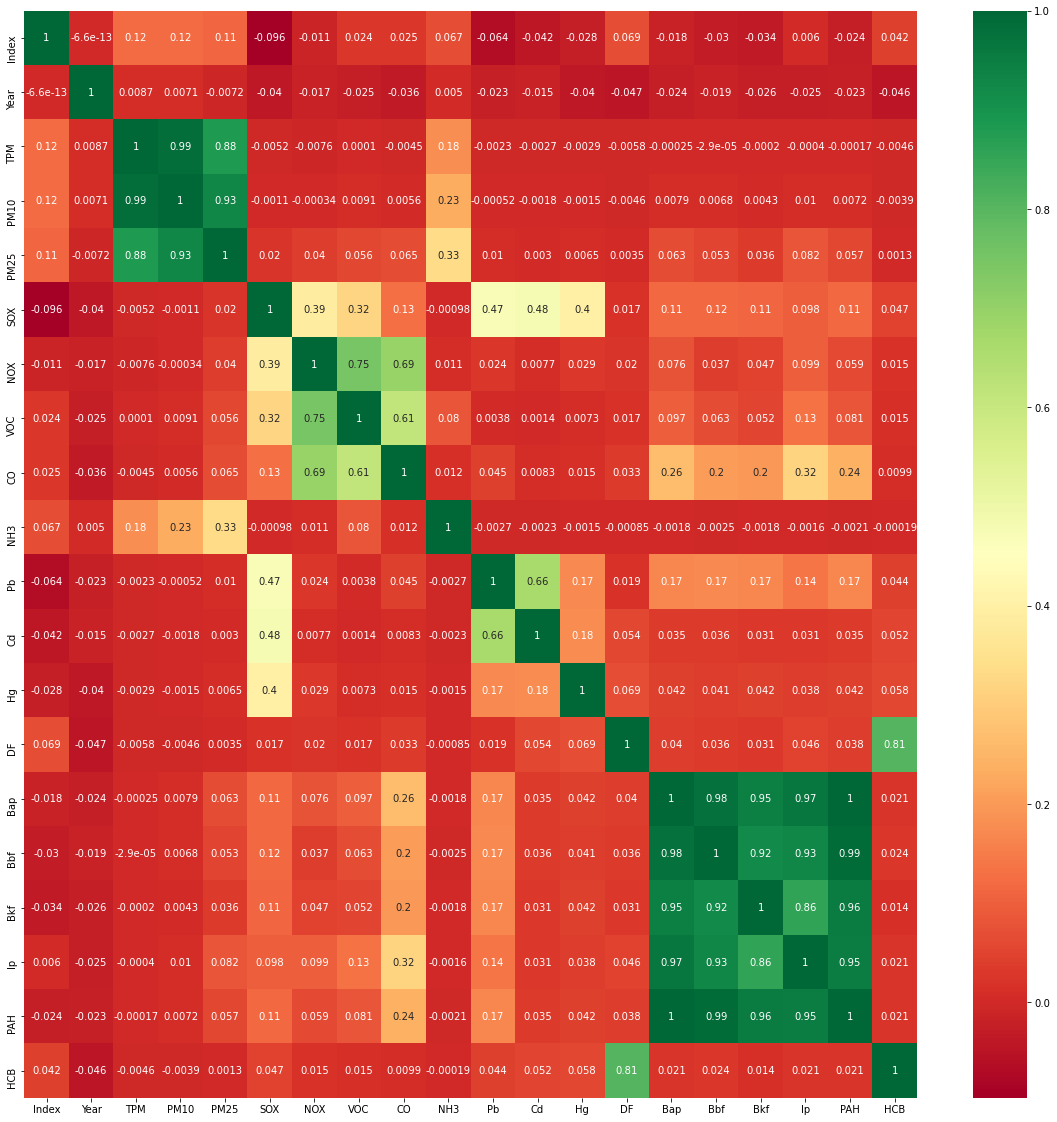

In [45]:
#Correlation Matrix with Heatmap

Xf = df3.drop('Region',axis=1)
yf = df3.Region

#get correlations of each features in dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [46]:
df3.head()

Index Region                      Source       Sector     Subsector total  \
0      1     AB  Ore and Mineral Industries  Unspecified  No_subsector     y   
1      1     BC  Ore and Mineral Industries  Unspecified  No_subsector     y   
3      1     MB  Ore and Mineral Industries  Unspecified  No_subsector     y   
4      1     NB  Ore and Mineral Industries  Unspecified  No_subsector     y   
5      1     NL  Ore and Mineral Industries  Unspecified  No_subsector     y   

   Year       TPM      PM10     PM25  ...      Pb    Cd        Hg   DF   Bap  \
0  1990  27838.26   8171.57  2874.89  ...  416.16  5.77     92.82  0.0  0.41   
1  1990  24263.86  11296.73  6158.37  ...   57.77  1.85   3084.90  0.0  9.16   
3  1990  10781.34   6530.92  3287.36  ...   28.56  0.53  19959.68  0.0  0.04   
4  1990   4856.68   1529.10   651.46  ...   18.29  0.95    121.56  0.0  0.10   
5  1990  26990.26   3670.51  1494.64  ...   46.04  0.38     62.83  0.0  0.01   

     Bbf    Bkf    Ip    PAH  HCB  
0   1.43   0.51  0.41   2.75  0.0  
1  12.69  12.11  5.06  39.03  0.0  
3   0.13   0.05  0.04   0.25  0.0  
4   0.35   0.12  0.10   0.67  0.0  
5   0.04   0.02  0.01   0.09  0.0  

[5 rows x 25 columns]

In [48]:
#33% of the feature: "Years" for test set begins from 2010 to 2019

In [47]:
a = sum(df3.Year == 2019)
a

2041

In [48]:
b = sum(df3.Year == 2018)
b

2041

In [49]:
c = sum(df3.Year == 2017)
c

2041

In [50]:
d = sum(df3.Year == 2016)
d

2041

In [51]:
e = sum(df3.Year == 2015)
e

2041

In [52]:
f = sum(df3.Year == 2014)
f

2041

In [53]:
g = sum(df3.Year == 2013)
g

2041

In [54]:
h = sum(df3.Year == 2012)
h

2041

In [55]:
i = sum(df3.Year == 2011)
i

2041

In [56]:
j = sum(df3.Year == 2010)
j

2041

In [57]:
test_rows = (a+b+c+d+e+f+g+h+i+j)
test_rows

20410

In [58]:
t = 61620
yrcount = t - test_rows
yrcount

41210

In [59]:
test_index = test_rows / t
test_index

0.33122362869198313

In [60]:
train_index = 1 - test_index
train_index

0.6687763713080168

In [61]:
#Data Mining Techniques

In [62]:
#1. Decision Tree Model

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [63]:
#Decision Tree Classifier
#Splitting train set according to year count from 0 to 41210 rows which is 67% of the dataset

Xd = df3.values[0:41210, 0:1 & 3:]
yd = df3.values[0:41210, 2] #according to Source

In [64]:
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size = 0.33, shuffle = False, random_state = 1)

In [65]:
tree_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, min_samples_leaf = 3)
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3)

In [66]:
y_pred_en = tree_entropy.predict(X_test)
y_pred_en

array(['Manufacturing', 'Manufacturing', 'Manufacturing', ...,
       'Manufacturing', 'Manufacturing', 'Manufacturing'], dtype=object)

In [67]:
print(("The Accuracy is"), accuracy_score(y_test, y_pred_en)*100)

The Accuracy is 66.54411764705883


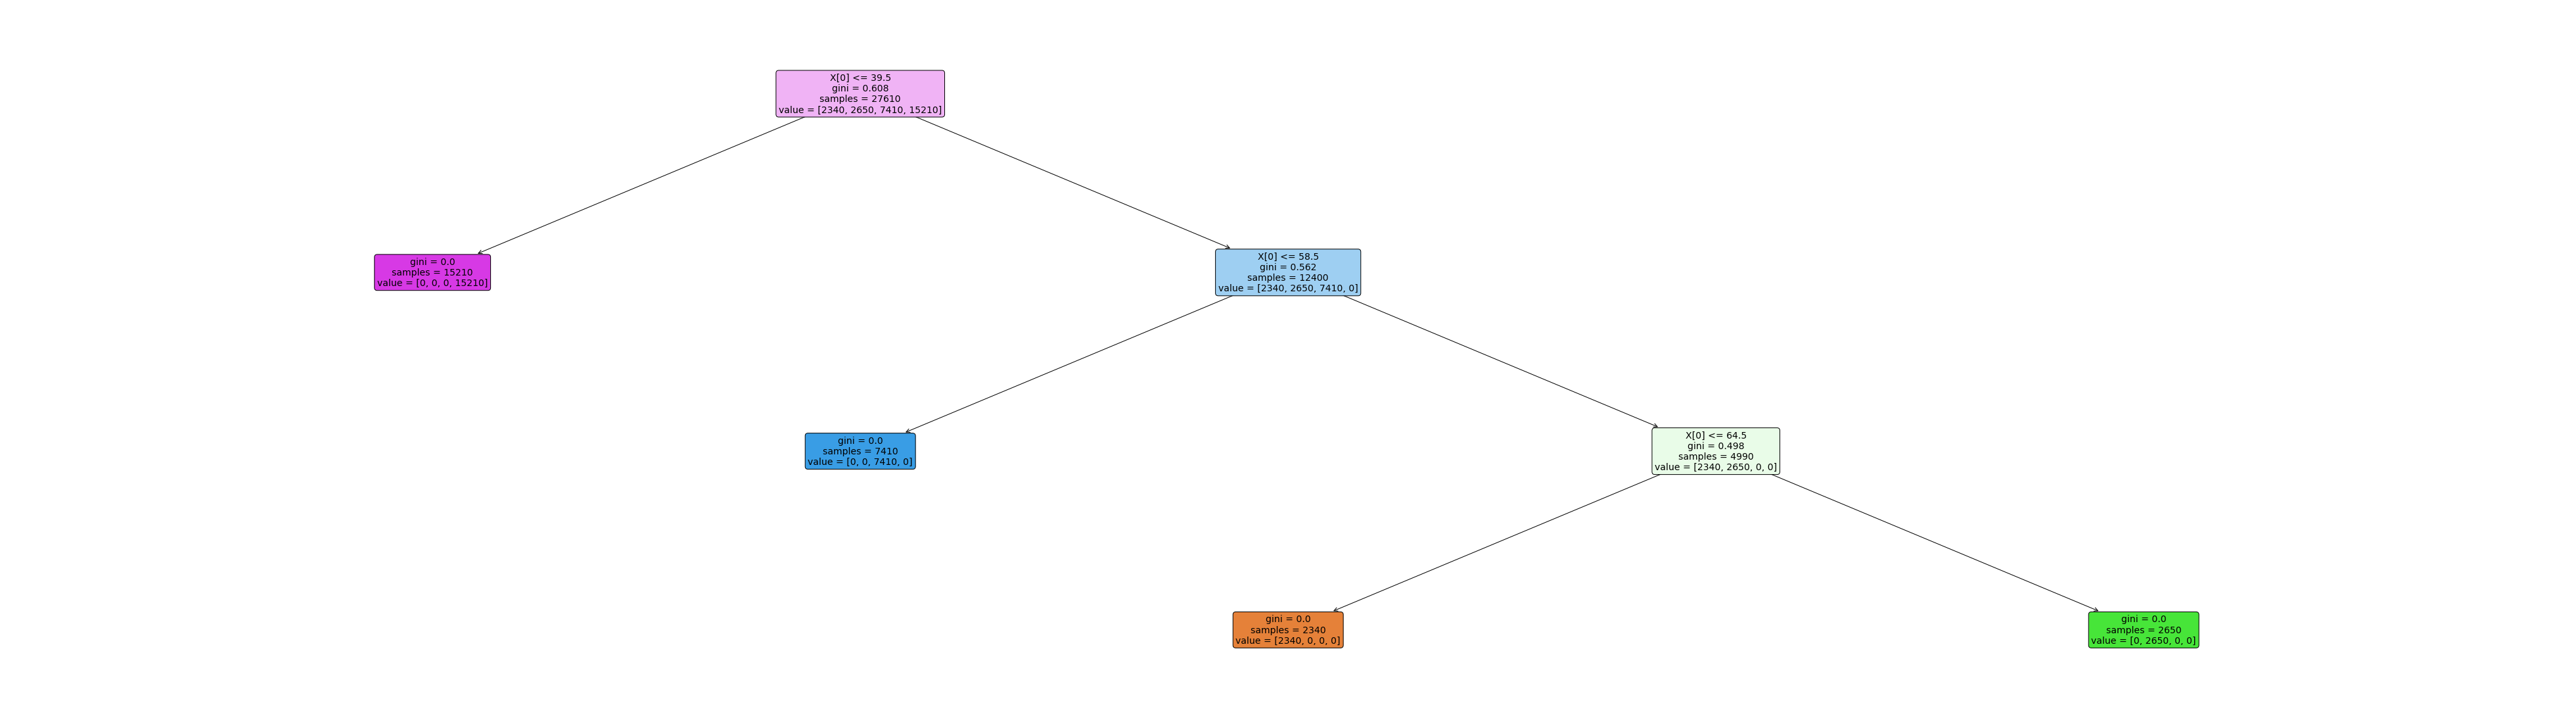

In [68]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(max_depth=10, random_state = 0) #max_depth is maximum number of levels in the tree
clf.fit(X_train, y_train)

plt.figure(figsize=(70,20))
a = plot_tree(clf, 
              filled=True, 
              rounded=True, 
              fontsize=14)

#0 denotes that all elements belong to a certain class or if there exists only one class, and
#1 denotes that the elements are randomly distributed across various classes.
#0.5 denotes equally distributed elements into some classes.


In [69]:
X = df3[['Year', 'TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'VOC', 'CO', 'NH3', 'Pb', 'Cd',
                    'Hg','DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB']] 
y = df3['Source']

model_d = clf.fit(X, y)

<AxesSubplot:>

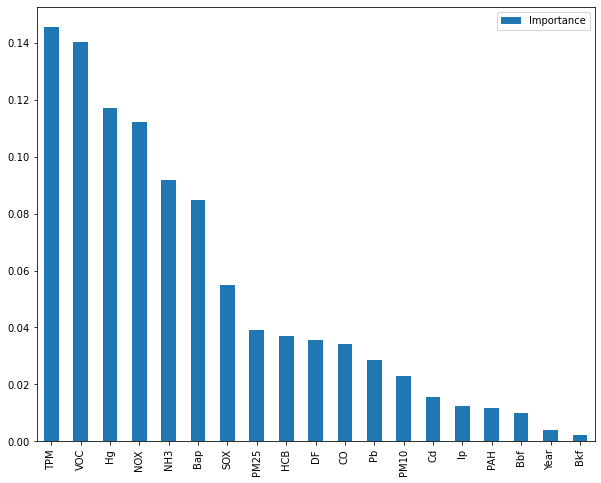

In [71]:
feat_importances1 = pd.DataFrame(model_d.feature_importances_, index = X.columns, columns = ["Importance"])
feat_importances1.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_importances1.plot(kind = 'bar', figsize = (10, 8))

<AxesSubplot:>

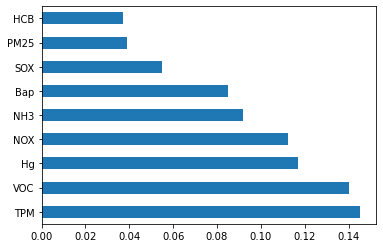

In [145]:
feat_importances1 = pd.Series(model_d.feature_importances_, index=X.columns)
feat_importances1.nlargest(9).plot(kind='barh')

In [74]:
#2. Random Forest Classifier

from sklearn.model_selection import train_test_split
Xr = df3.values[0:41210, 0:1 & 3:]
yr = df3.values[0:41210, 2] #according to Source

In [75]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.33, shuffle = False, random_state = 1)

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=0)

In [77]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [79]:
forest.predict([[21]])

array(['Ore and Mineral Industries'], dtype=object)

In [80]:
from sklearn import metrics
y_pred = forest.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 66.54411764705883


In [81]:
clf = RandomForestClassifier(n_estimators = 5, random_state = 0)

X2 = df3[['Year', 'TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'VOC', 'CO', 'NH3', 'Pb', 'Cd',
                    'Hg','DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB']] 
y2 = df3['Source']

model_r = clf.fit(X2, y2)

<AxesSubplot:>

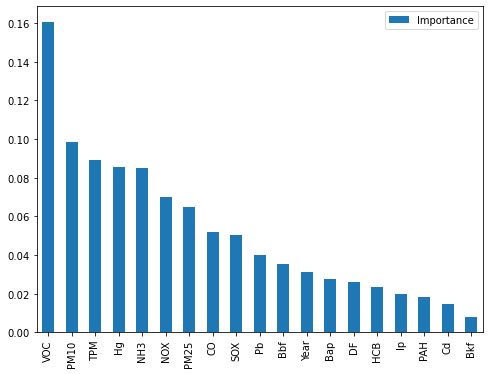

In [82]:
feat_importances2 = pd.DataFrame(model_r.feature_importances_, index = X2.columns, columns = ["Importance"])
feat_importances2.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_importances2.plot(kind = 'bar', figsize=(8,6))

<AxesSubplot:>

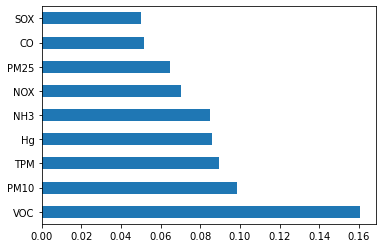

In [146]:
feat_importances2 = pd.Series(model_r.feature_importances_, index = X2.columns)
feat_importances2.nlargest(9).plot(kind = 'barh')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

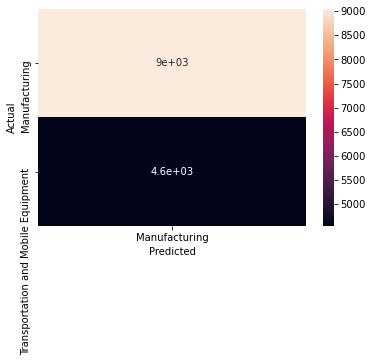

In [144]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [134]:
#1. Which of the provinces display an upward trend of air pollutant emissions for 2019?

In [154]:
#Using Decision Tree selected features, drop other features except Region and Year

df4 = df3.drop(['Index', 'Source', 'Sector', 'Subsector', 'total', 
                'Pb', 'Cd', 'DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB'], axis = 1, inplace = False)

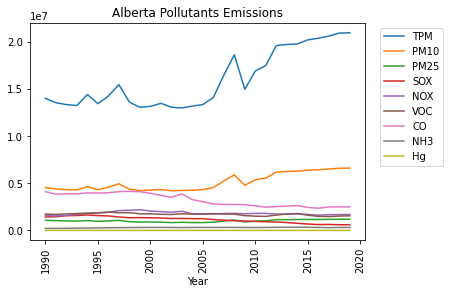

In [155]:
#Alberta shows increase in TPM and PM10 pollutants emissions.

dfab = df4[df4.Region == 'AB']
df_ab = dfab.groupby(['Year']).sum()
df_AB = pd.DataFrame(data = df_ab)
df_AB.plot.line(title='Alberta Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

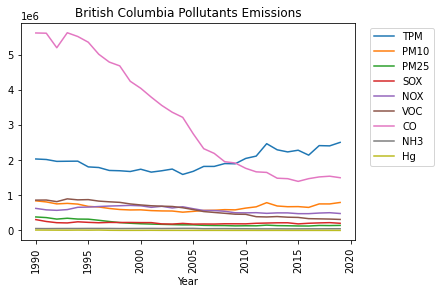

In [156]:
#British Columbia shows slight increase in TPM pollutants emissions.

dfbc = df4[df4.Region == 'BC']
df_bc = dfbc.groupby(['Year']).sum()
df_BC = pd.DataFrame(data = df_bc)
df_BC.plot.line(title='British Columbia Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

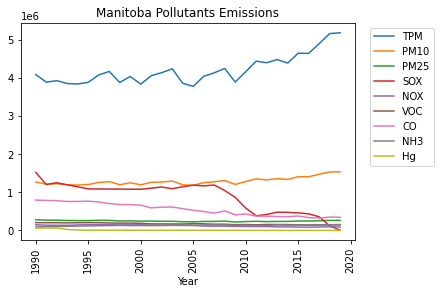

In [157]:
#Manitoba shows increase in TPM pollutants emissions.

dfmb = df4[df4.Region == 'MB']
df_mb = dfmb.groupby(['Year']).sum()
df_MB = pd.DataFrame(data = df_mb)
df_MB.plot.line(title='Manitoba Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

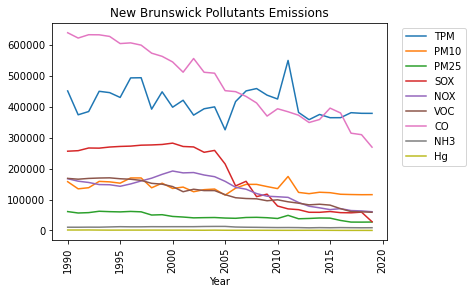

In [158]:
#New Brunswick shows decrease in all pollutants emissions.

dfnb = df4[df4.Region == 'NB']
df_nb = dfnb.groupby(['Year']).sum()
df_NB = pd.DataFrame(data = df_nb)
df_NB.plot.line(title='New Brunswick Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

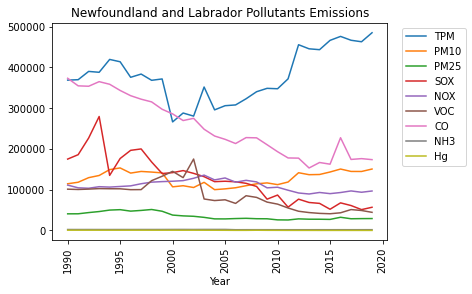

In [159]:
#Newfoundland and Labrador shows increase in TPM pollutants emissions.

dfnl = df4[df4.Region == 'NL']
df_nl = dfnl.groupby(['Year']).sum()
df_NL = pd.DataFrame(data = df_nl)
df_NL.plot.line(title='Newfoundland and Labrador Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

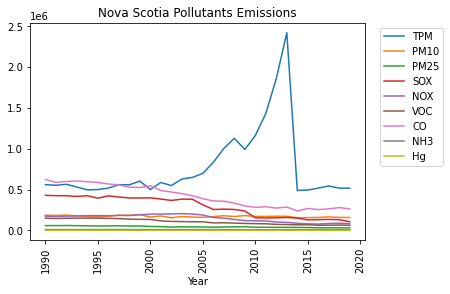

In [160]:
#Nova Scotia shows decrease in all pollutants emissions.

dfns = df4[df4.Region == 'NS']
df_ns = dfns.groupby(['Year']).sum()
df_NS = pd.DataFrame(data = df_ns)
df_NS.plot.line(title='Nova Scotia Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

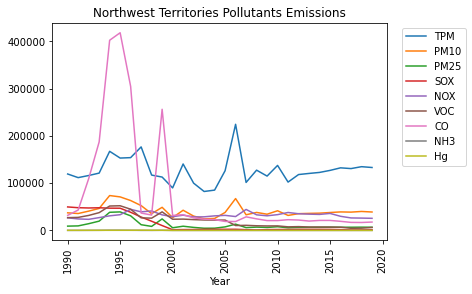

In [161]:
#Northwest Territories shows decrease in all pollutants emissions.

dfnt = df4[df4.Region == 'NT']
df_nt = dfnt.groupby(['Year']).sum()
df_NT = pd.DataFrame(data = df_nt)
df_NT.plot.line(title='Northwest Territories Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

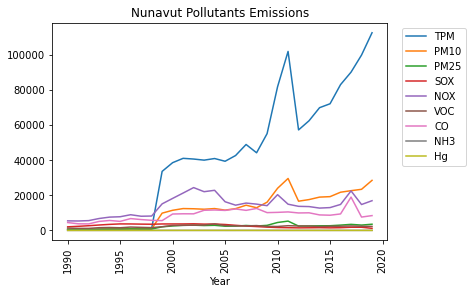

In [162]:
#Nunavut shows increase in TPM pollutants emissions.

dfnu = df4[df4.Region == 'NU']
df_nu = dfnu.groupby(['Year']).sum()
df_NU = pd.DataFrame(data = df_nu)
df_NU.plot.line(title='Nunavut Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

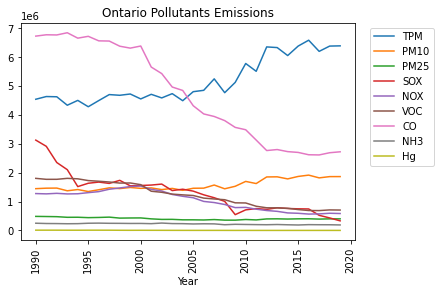

In [163]:
#Ontario shows increase in TPM pollutants emissions.

dfon = df4[df4.Region == 'ON']
df_on = dfon.groupby(['Year']).sum()
df_ON = pd.DataFrame(data = df_on)
df_ON.plot.line(title='Ontario Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

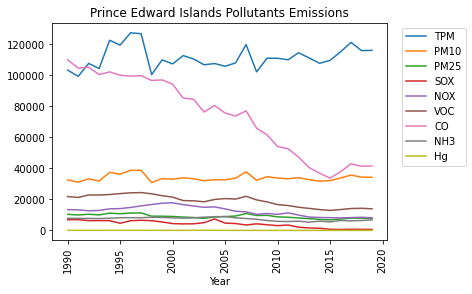

In [164]:
#Prince Edward Islands shows no change in high TPM pollutants emissions.

dfpe = df4[df4.Region == 'PE']
df_pe = dfpe.groupby(['Year']).sum()
df_PE = pd.DataFrame(data = df_pe)
df_PE.plot.line(title='Prince Edward Islands Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

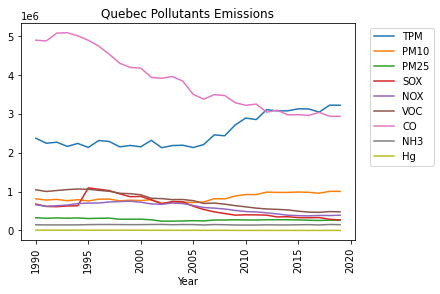

In [165]:
#Quebec shows increase in TPM pollutants emissions.

dfqc = df4[df4.Region == 'QC']
df_qc = dfqc.groupby(['Year']).sum()
df_QC = pd.DataFrame(data = df_qc)
df_QC.plot.line(title='Quebec Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

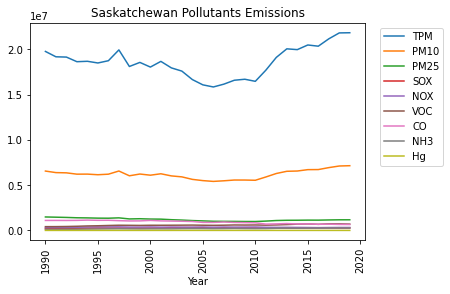

In [166]:
#Saskatchewan shows increase in TPM pollutants emissions.

dfsk = df4[df4.Region == 'SK']
df_sk = dfsk.groupby(['Year']).sum()
df_SK = pd.DataFrame(data = df_sk)
df_SK.plot.line(title='Saskatchewan Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

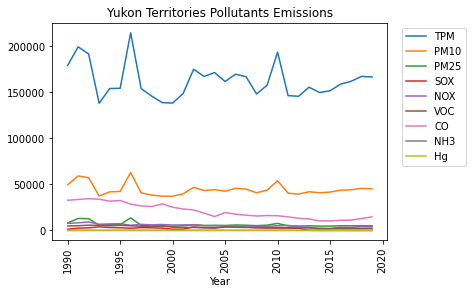

In [167]:
#Yukon Territories shows decrease in all pollutants emissions.

dfyt = df4[df4.Region == 'YT']
df_yt = dfyt.groupby(['Year']).sum()
df_YT = pd.DataFrame(data = df_yt)
df_YT.plot.line(title='Yukon Territories Pollutants Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#2. Which of the sources of emissions still need some reforms for 2019?

In [ ]:
#3. What are the 3 major sources of air pollutant emissions for the year 2020?

In [177]:
df5 = df2.round(decimals = 2)
df5.drop(['Index', 'Sector', 'Subsector', 'total', 
                'Pb', 'Cd', 'DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB'], axis = 1, inplace = True)
df5.head()

Region                      Source  Year       TPM      PM10     PM25  \
0     AB  Ore and Mineral Industries  1990  27838.26   8171.57  2874.89   
1     BC  Ore and Mineral Industries  1990  24263.86  11296.73  6158.37   
3     MB  Ore and Mineral Industries  1990  10781.34   6530.92  3287.36   
4     NB  Ore and Mineral Industries  1990   4856.68   1529.10   651.46   
5     NL  Ore and Mineral Industries  1990  26990.26   3670.51  1494.64   

         SOX       NOX      VOC       CO    NH3        Hg  
0    4778.53   7195.38  2889.14  3891.61  26.90     92.82  
1   23807.18  14506.71  2561.14  3141.29  70.29   3084.90  
3  500814.76   1117.76   224.26  2546.50   2.14  19959.68  
4    8997.05   1222.39   742.18   913.61   6.46    121.56  
5    7926.02   6936.84    28.23   168.67  20.59     62.83

In [181]:
name_list = list(df5)

for name in name_list:
    if name != 'Region' and name != 'Source' and name != 'Year':
        new_row = []
        quantiles = df5[name].quantile([.25, .5, .75])
        row_list = df5[name].tolist()
        for i, value in enumerate(row_list):
            if value < quantiles[.25]:
                new_row.append('0')
            elif value < quantiles[.75] and value >= quantiles[.25]:
                new_row.append('1')
            else:
                new_row.append('2')
        series = pd.Series(new_row)
        df5[name] = series.values

df5.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [182]:
from xgboost import XGBClassifier

X3 = df5[['Year', 'TPM', 'PM25', 'SOX', 'NOX', 'VOC', 'CO', 'NH3', 'Hg']] 
y3 = df5['Source']

xgb_model = XGBClassifier(n_estimators=5, enable_categorical = True,
                          objective="binary:logistic", use_label_encoder=False,
                          random_state=1)
xgb_model.fit(X3, y3)

y_prob = pd.DataFrame(xgb_model.predict_proba(X3))[0] 

ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].

In [ ]:
y_prob = pd.DataFrame(xgb_model.predict_proba(X))[0]
df6 = pd.DataFrame(X3, columns=df5.feature_names)

df6['probability'] = y_prob

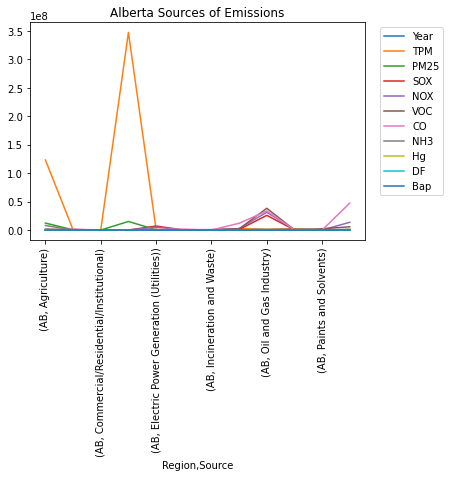

In [117]:
df5ab = df5[df5.Region == 'AB']
df5_ab = df5ab.groupby(['Region', 'Source']).sum()
df5_AB = pd.DataFrame(data = df5_ab)
df5_AB.plot.line(title='Alberta Sources of Emissions')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [140]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
Xl, yl = make_classification(df5, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(Xl, yl)
# make predictions
yhat = model.predict(Xl)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
#4. Which of the provinces have reduced all of the air pollutant emissions for the year 2020?

In [103]:
df3_2019 = df3[df3.Year == 2019]
df3_2019.drop(columns = ['Year'], axis = 1, inplace = True)
df3_2019.head()

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Region        TPM     PM25       SOX      NOX      VOC        CO     NH3  \
406     AB   33110.36  2645.40   1191.02  4730.86  2593.25  11881.26  540.68   
407     BC  127598.70  9301.30  14523.24  8271.40   992.53  50702.06  303.04   
409     MB    6433.14   911.34     90.62   444.63   562.69   1030.49    0.00   
410     NB    6623.29   346.28     68.90   196.57  1358.43    900.19    0.00   
411     NL   12224.44   750.57   6439.27  6682.33   326.43   6429.87    4.29   

         Hg    DF   Bap  
406   57.86  0.16  0.40  
407  118.92  0.01  0.21  
409   19.46  0.30  0.10  
410    7.65  0.00  0.20  
411   24.70  0.00  0.03

In [115]:
df4 = df3_2019.groupby('Region').sum()
df4

TPM        PM25        SOX         NOX         VOC  \
Region                                                               
AB      30910574.31  1718454.46  814911.86  2324120.20  2111887.84   
BC       3684258.96   207561.00  272410.79   686816.93   452759.56   
MB       7566737.04   374584.17    7844.12   137796.25   210246.11   
NB        563025.11    39864.74   39178.77    87542.70    86296.07   
NL        721354.27    43071.52   77562.81   137984.74    63840.15   
NS        773197.45    46620.26  160132.10   124395.45    93384.18   
NT        199259.12     9984.74    1925.12    35354.28     8738.75   
NU        167315.37     5202.33    1774.90    24401.41     3282.69   
ON       9443903.44   585244.67  446166.09   856133.21  1049779.77   
PE        169130.74    11216.38     944.91    12223.11    20132.51   
QC       4769905.71   387841.02  361817.91   571118.69   709552.74   
SK      31735463.59  1659420.12  385547.96   474717.91   949437.06   
YT        249936.44     7586.99      21.70     6093.17     3419.06   

                CO        NH3       Hg     DF       Bap  
Region                                                   
AB      3512231.34  448091.64  3021.07  15.13   5029.73  
BC      2179431.98   69513.77   985.04  20.42   4725.28  
MB       517276.48  214462.66   191.19   5.71   1546.94  
NB       398070.48   12485.44   164.52   6.57   3789.92  
NL       254624.79    2836.26   144.88   7.98   1745.03  
NS       394003.98   11555.38   282.38   7.46   3892.40  
NT        25552.79      53.70    17.93   0.24     89.54  
NU        12242.48      19.20     1.96   0.76      7.41  
ON      4039073.19  279868.22  3491.40  52.64  17238.83  
PE        62239.63    9677.03    13.42   1.12    618.06  
QC      4216876.71  216535.61  1864.41  49.52  26681.75  
SK       953399.39  369496.12  1678.64  13.68   1616.45  
YT        22065.53      51.12     6.72   0.08     26.60

In [ ]:
#2. Which of the sources of emissions still need some reforms for 2019?

In [115]:
ycv= df3.Region

In [116]:
ycv.head()

0    AB
1    BC
3    MB
4    NB
5    NL
Name: Region, dtype: object

In [117]:
Xcv=df3.drop('Region',axis=1)

In [118]:
Xcv.head()

Index                      Source       Sector     Subsector total  Year  \
0      1  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
1      1  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
3      1  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
4      1  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
5      1  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   

        TPM      PM10     PM25        SOX  ...      Pb    Cd        Hg   DF  \
0  27838.26   8171.57  2874.89    4778.53  ...  416.16  5.77     92.82  0.0   
1  24263.86  11296.73  6158.37   23807.18  ...   57.77  1.85   3084.90  0.0   
3  10781.34   6530.92  3287.36  500814.76  ...   28.56  0.53  19959.68  0.0   
4   4856.68   1529.10   651.46    8997.05  ...   18.29  0.95    121.56  0.0   
5  26990.26   3670.51  1494.64    7926.02  ...   46.04  0.38     62.83  0.0   

    Bap    Bbf    Bkf    Ip    PAH  HCB  
0  0.41   1.43   0.51  0.41   2.75  0.0  
1  9.16  12.69  12.11  5.06  39.03  0.0  
3  0.04   0.13   0.05  0.04   0.25  0.0  
4  0.10   0.35   0.12  0.10   0.67  0.0  
5  0.01   0.04   0.02  0.01   0.09  0.0  

[5 rows x 24 columns]

In [122]:
Xcv = df3.values[0:43133, 0 & 2:]
ycv = df3.values[0:43133, 1]

In [123]:
#K-fold Cross Validation using scikit learn

from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [125]:
k = 10
kf = KFold(n_splits = k, random_state = None, shuffle = False)
lrf = LogisticRegression(solver = 'liblinear')

acc_score = []
 
for train_index , test_index in kf.split(Xcv):
    X_train , X_test = Xcv[train_index, 0:43133], Xcv[test_index, 43133: ]
    y_train , y_test = ycv[train_index], ycv[test_index]

    model = lrf.fit(X_train, y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


ValueError: could not convert string to float: 'SK'

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Xl = df3.values[0:4121, 0:1 & 3:]
yl = df3.values[0:4121, 2]

k = 10
kf = KFold(n_splits = k, random_state = None)
model = LogisticRegression(solver = 'liblinear')

result = cross_val_score(model , Xl, yl, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: nan


C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 576, in _validate_da

In [77]:
from sklearn.model_selection import train_test_split

Xt = df3.values[ : , 0 & 2:]
yt = df3.values[ : , 1]

X_train, X_test, Y_train, Y_test = train_test_split(Xt, yt, train_size=0.96667, test_size=0.03333, random_state=1, stratify=yt)
print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (59566, 25) (2054, 25) (59566,) (2054,)


In [78]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, Y_train)

ValueError: could not convert string to float: 'YT'

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [81]:
#define predictor and response variables
Xkf = df3.values[ : , 0:5 & 7:]
ykf = df3.values[ : , 6]

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, Xkf, ykf, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)


C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 576, in _validate_data
  

In [82]:
#view mean absolute error
mean(absolute(scores))

nan

In [83]:
#view RMSE
sqrt(mean(absolute(scores)))

nan

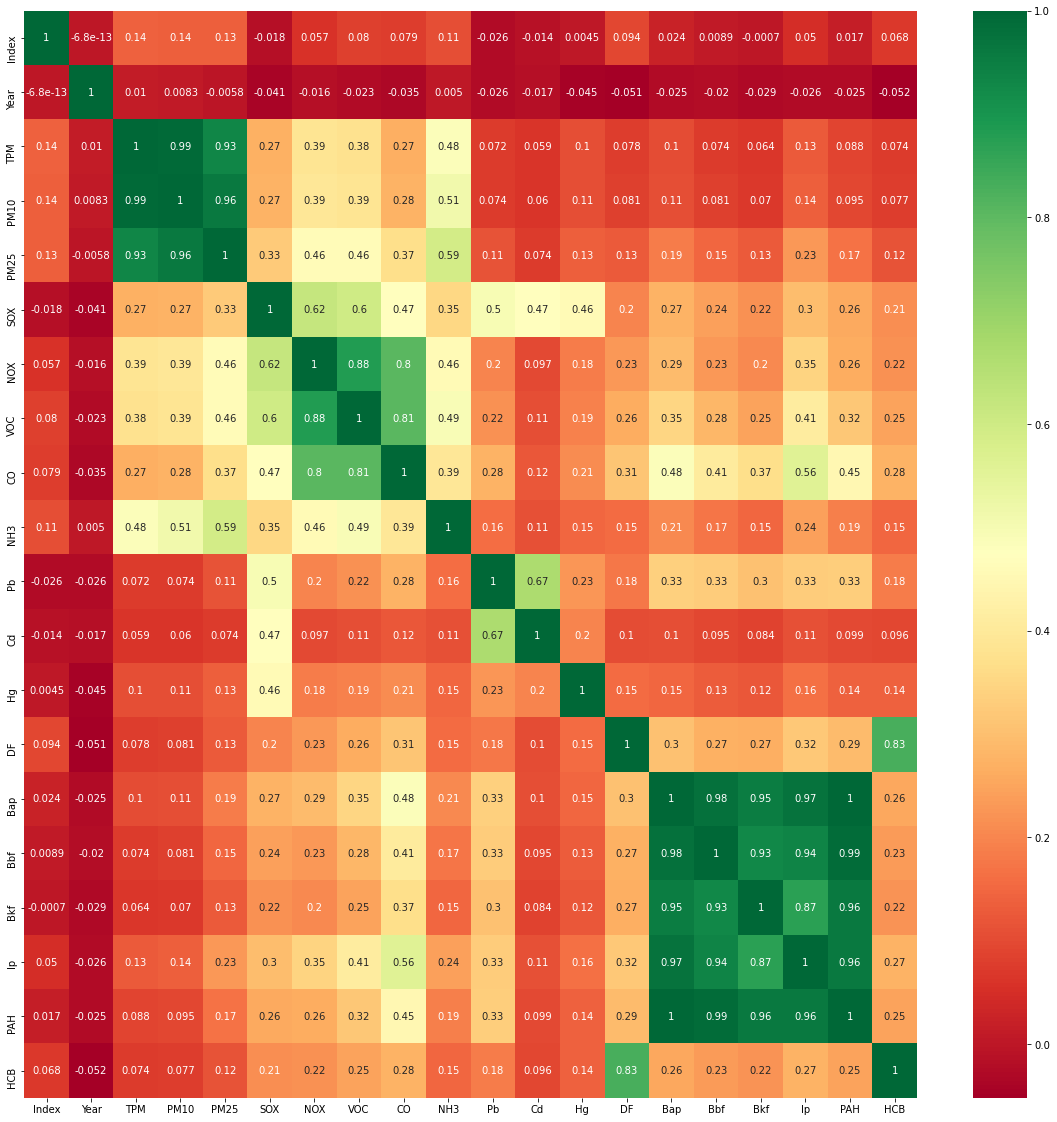

In [69]:
#Correlation Matrix with Heatmap

Xf = df3.drop('Region',axis=1)
yf = df3.Region

#get correlations of each features in dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [93]:
#Backward Elimination
Xb = df3.drop(['Index', 'Region'], axis=1)
yb = df3['Region']

In [67]:
Xb.shape, yb.shape


((61620, 23), (61620,))

In [89]:
!pip install mlxtend

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [73]:
lreg = LinearRegression()

In [74]:
sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [75]:
sfs1 = sfs1.fit(Xb, yb)

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:423: RuntimeWarning: Mean of empty slice
  'avg_score': np.nanmean(k_score)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\skle

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 20/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.0s finished
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:642: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 16/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_s

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 15/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 14/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:642: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 12/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorf

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 10/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

In [76]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Source', 'Sector', 'Subsector', 'total', 'Year', 'TPM', 'PM10', 'PM25']


In [77]:
new_data = df3[feat_names]
new_data['Region'] = df3['Region']

new_data.head()

C:\Users\ELIZAB~1\AppData\Local\Temp/ipykernel_22188/884190151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Region'] = df3['Region']


Source       Sector     Subsector total  Year  \
0  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
1  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
3  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
4  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   
5  Ore and Mineral Industries  Unspecified  No_subsector     y  1990   

        TPM      PM10     PM25 Region  
0  27838.26   8171.57  2874.89     AB  
1  24263.86  11296.73  6158.37     BC  
3  10781.34   6530.92  3287.36     MB  
4   4856.68   1529.10   651.46     NB  
5  26990.26   3670.51  1494.64     NL

In [78]:
# shape of new and original data
new_data.shape, df3.shape

((61620, 9), (61620, 25))